# Defect Classification via transfer learning <br>from a pre-trained VGG16 CNN model 
Code credit: <br>Banerjee, Debanshu, and Taylor D. Sparks. "Comparing Transfer Learning to Feature Optimization in Microstructure Classification." iScience (2022): 103774.

### Importing the necessary libraries

In [1]:
import matplotlib.pyplot as plt
from matplotlib import pyplot
import numpy as np 
from cv2 import cv2 
import os
import glob
from keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array
import keras as keras
from keras.layers import GlobalAveragePooling2D
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.layers import Dense,Activation,Flatten,Dropout
from keras.layers import merge,Input
from keras.models import Model
from keras.utils import np_utils
from keras.models import load_model
from sklearn.metrics import accuracy_score
from tensorflow.keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as pi_incep
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input as pi_xcep 
import tensorflow as tf

### Next we load in the labeled image data

C:\Users\wsmallwood\wsmallwood\MSE 7050 - Material Informatics\ODEV_NN_images\Clear\IMG_0055.JPG


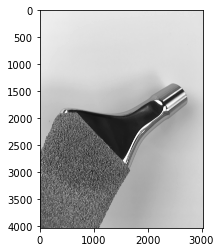

C:\Users\wsmallwood\wsmallwood\MSE 7050 - Material Informatics\ODEV_NN_images\Clear\IMG_0059.JPG


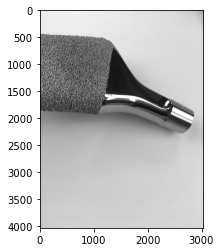

C:\Users\wsmallwood\wsmallwood\MSE 7050 - Material Informatics\ODEV_NN_images\Clear\IMG_0060.JPG


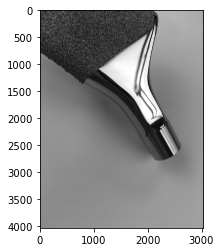

3
3
C:\Users\wsmallwood\wsmallwood\MSE 7050 - Material Informatics\ODEV_NN_images\Defect\IMG_0054.JPG


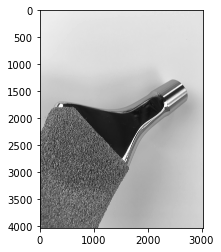

C:\Users\wsmallwood\wsmallwood\MSE 7050 - Material Informatics\ODEV_NN_images\Defect\IMG_0056.JPG


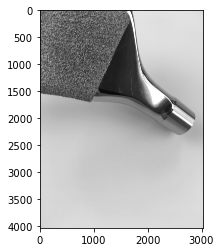

C:\Users\wsmallwood\wsmallwood\MSE 7050 - Material Informatics\ODEV_NN_images\Defect\IMG_0057.JPG


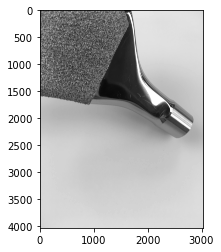

C:\Users\wsmallwood\wsmallwood\MSE 7050 - Material Informatics\ODEV_NN_images\Defect\IMG_0058.JPG


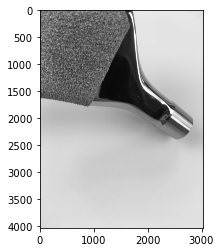

C:\Users\wsmallwood\wsmallwood\MSE 7050 - Material Informatics\ODEV_NN_images\Defect\IMG_0061.JPG


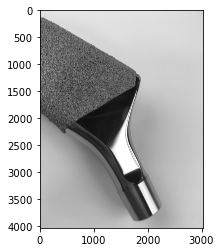

8
8


In [6]:
# The name of the image files is imported along with the image
# The y variable is a label, 0 = clear or 1 = defect

img_dir=r"C:\Users\wsmallwood\wsmallwood\MSE 7050 - Material Informatics\ODEV_NN_images\Clear"
data_path=os.path.join(img_dir,'*.jpg')
files=glob.iglob(data_path)
data,y,name=[],[],[]

for f in files:
    img=cv2.imread(f)
    #print(s)
    print(f)
    img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    #img=img[0:600,0:600]
    plt.imshow(img,cmap='gray')
    plt.show()
    data.append(img)
    y.append(1)
    name.append(s)
print(len(data))
print(len(y))

img_dir=r"C:\Users\wsmallwood\wsmallwood\MSE 7050 - Material Informatics\ODEV_NN_images\Defect"
data_path=os.path.join(img_dir,'*.jpg')
files=glob.iglob(data_path)

for f in files:
    img=cv2.imread(f)
    #print(s)
    print(f)
    img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    #img=img[0:600,0:600]
    plt.imshow(img,cmap='gray')
    plt.show()
    data.append(img)
    y.append(1)
    name.append(s)
print(len(data))
print(len(y))

### Here is where I could augment the data by rotating the images

Keras `ImageDataGenerator` has a function that will rotate the image 0-360 degrees and save as new image. I will forgo that step due to time constraints <br> I'm also going to refrain from resizing the images and see what happens

In [96]:
print(img_dir)

C:\Users\wsmallwood\wsmallwood\MSE 7050 - Material Informatics\ODEV_NN_images


In [34]:
# Import the images and split at 7:3 ratio between the training and validation sets
img_dir=r"C:\Users\wsmallwood\wsmallwood\MSE 7050 - Material Informatics\ODEV_NN_images"
train_datagen=ImageDataGenerator(validation_split=0.3,preprocessing_function=preprocess_input) 

train_generator_vgg16=train_datagen.flow_from_directory(directory=img_dir,class_mode='binary', subset='training')
test_generator_vgg16=train_datagen.flow_from_directory(directory=img_dir,class_mode='binary',subset='validation')

Found 7 images belonging to 2 classes.
Found 1 images belonging to 2 classes.


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0   

C:\Users\wsmallwood\Miniconda3\envs\my_pymatgen\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
C:\Users\wsmallwood\AppData\Local\Temp\ipykernel_33208\1706343068.py:29: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist=model.fit_generator(steps_per_epoch=1,generator=train_generator_vgg16,validation_data=test_generator_vgg16,validation_steps=1,epochs=5,callbacks=[checkpoint,early])


Epoch 1/5
1/1 [==============================] - ETA: 0s - loss: 12.3307 - accuracy: 0.1429
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to model
INFO:tensorflow:Assets written to: model\assets
1/1 [==============================] - 15s 15s/step - loss: 12.3307 - accuracy: 0.1429 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/5
1/1 [==============================] - ETA: 0s - loss: 28924240359063552.0000 - accuracy: 0.5714
Epoch 2: val_accuracy did not improve from 1.00000
1/1 [==============================] - 10s 10s/step - loss: 28924240359063552.0000 - accuracy: 0.5714 - val_loss: 145914208.0000 - val_accuracy: 0.0000e+00
Epoch 3/5
1/1 [==============================] - ETA: 0s - loss: 77233944.0000 - accuracy: 0.4286
Epoch 3: val_accuracy did not improve from 1.00000
1/1 [==============================] - 11s 11s/step - loss: 77233944.0000 - accuracy: 0.4286 - val_loss: 635923520.0000 - val_accuracy: 0.0000e+00
Epoch 4/5
1/1 [===========================

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file saved_model already exists.
Error occurred while processing: saved_model.


INFO:tensorflow:Assets written to: saved_model/Model_VGG16\assets


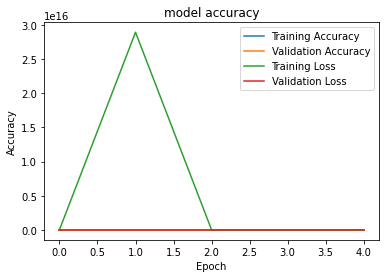

In [39]:
# Implementation of VGG16 network
# new_input=Input(shape=(300,300,3))
model=VGG16(include_top=False,pooling='max',classes=2,weights='imagenet') 
# First we implement the network with the ImageNet weights

# We add fully connected and softmax layers at the end of the network
flat1=Flatten()(model.layers[-1].output)
class1=Dense(1024,activation='relu')(flat1)
output=Dense(1,activation='sigmoid')(class1)
model=Model(inputs=model.inputs,outputs=output)

# The netwrok architecture is checked
#model.summary()
opt=Adam(lr=0.027) # Specify the learning the rate for the ADAM optimizer
model.compile(optimizer=opt,loss=keras.losses.binary_crossentropy,metrics=['accuracy'])
model.summary()

# Try out training different combination of layers by freezing and unfreezing them 
for layer in model.layers[:0]:
	layer.trainable=False
for i,layer in enumerate(model.layers):
    print(i,layer.name,layer.trainable)

# After every iteration the weights will be saved only if the performace improves

checkpoint=ModelCheckpoint('model',monitor='val_accuracy',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',period=1)

# Early stopping has been implemented to avoid unnecessary iterations

early=EarlyStopping(monitor='val_accuracy',min_delta=0,patience=20,verbose=1,mode='auto')

hist=model.fit_generator(steps_per_epoch=1,generator=train_generator_vgg16,validation_data=test_generator_vgg16,validation_steps=1,epochs=5,callbacks=[checkpoint,early])


# The model is saved and the performance is plotted
!mkdir -p saved_model
model.save('saved_model/Model_VGG16')
plt.plot(hist.history["accuracy"])
plt.plot(hist.history['val_accuracy'])
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Training Accuracy","Validation Accuracy","Training Loss","Validation Loss"])
plt.show()

Note: Parameters I changed from the paper: <br> <br> `class mode` from categorical to binary <br> `output` layer from 2 to 1 <br> `loss` function from categorical_crossentropy to binary_crossentropy <br> number of `steps` from 20 to 2 <br> number of `epochs` from 100 to 5

### Last step - let's predict a defect

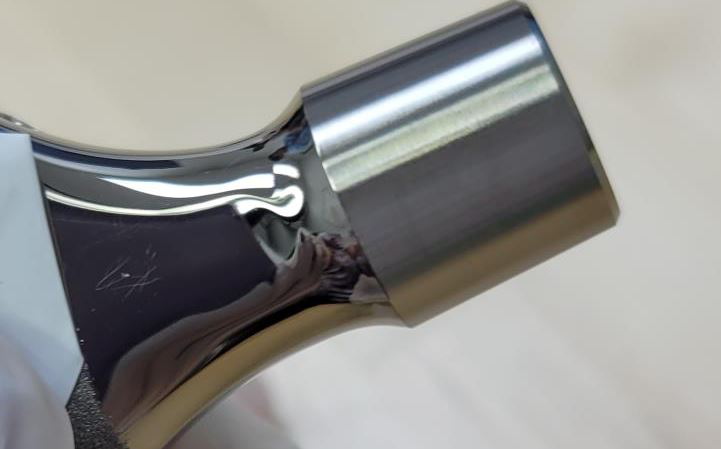

In [97]:
test_img_path = r"C:\Users\wsmallwood\wsmallwood\MSE 7050 - Material Informatics\ODEV_NN_images\test\defect.jpg"
#test_img_path = r"C:\Users\wsmallwood\wsmallwood\MSE 7050 - Material Informatics\ODEV_NN_images\test\clear.jpg"
test_img = image.load_img(test_img_path,color_mode='rgb')
display(test_img)

In [98]:
X = image.img_to_array(test_img)
X.shape

(449, 721, 3)

In [99]:
#The model expects a 4 dimensional array
X=np.expand_dims(X,axis=0)
X.shape

(1, 449, 721, 3)

In [100]:
X = preprocess_input(X)
#features = model.predict(X)

features = model.predict_generator(X)
print(features)

#label = decode_predictions(features)
#print(label)
#label = label[0][0]
#print('%s (%.2f%%)' % (label[1], label[2]*100))

C:\Users\wsmallwood\AppData\Local\Temp\ipykernel_33208\102729557.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  features = model.predict_generator(X)


[[1.]]
